In [1]:
import pandas as pd
import numpy as np
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
def load_csv_dataset():
    
    data = pd.read_csv('../data/features_30_sec.csv')
    classes = data[["label"]]
    features = data.drop(['filename', 'label'], axis=1)
    
    encoder = LabelEncoder()
    classes = encoder.fit_transform(classes.values.ravel())
    classes = to_categorical(classes)
    
    return features, classes

In [ ]:
X, y = load_csv_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test))

In [ ]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

In [ ]:
model.evaluate(X_test, y_test, batch_size=128)

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [2]:
path = '../data/images_original'

In [3]:
def load_image_dataset():
    
    imgs = keras.utils.image_dataset_from_directory(path, labels='inferred', color_mode='rgb', batch_size=1000)

    images = []
    labels = []
    for (i, l) in imgs.as_numpy_iterator():
        images = i / 255
        labels = to_categorical(l)
        
    return images, labels

Found 999 files belonging to 10 classes.


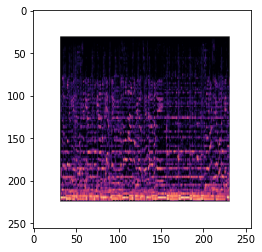

In [4]:
images, labels = load_image_dataset()
plt.imshow(images[0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels)

In [6]:
input_shape = X_train.shape[1:]
num_classes = 10

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 83s 16s/step - loss: 7.6552 - accuracy: 0.0912 - val_loss: 2.3134 - val_accuracy: 0.1286
Epoch 2/50
5/5 [==============================] - 78s 15s/step - loss: 2.3371 - accuracy: 0.0930 - val_loss: 2.2966 - val_accuracy: 0.0929
Epoch 3/50
5/5 [==============================] - 77s 15s/step - loss: 2.3031 - accuracy: 0.1091 - val_loss: 2.3020 - val_accuracy: 0.0929
Epoch 4/50
5/5 [==============================] - 77s 15s/step - loss: 2.3049 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.0571
Epoch 5/50
5/5 [==============================] - 77s 15s/step - loss: 2.3020 - accuracy: 0.1127 - val_loss: 2.3043 - val_accuracy: 0.0571
Epoch 6/50
5/5 [==============================] - 77s 15s/step - loss: 2.3017 - accuracy: 0.1073 - val_loss: 2.3054 - val_accuracy: 0.0714
Epoch 7/50
5/5 [==============================] - 76s 15s/step - loss: 2.2986 - accuracy: 0.1216 - val_loss: 2.2940 - val_accuracy: 0.1071
Epoch 8/50
5/5 [===========

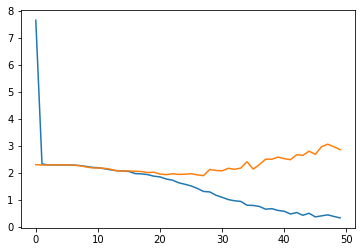

In [10]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

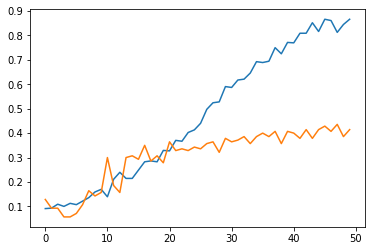

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

In [15]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 6s 570ms/step - loss: 2.5091 - accuracy: 0.3733


[2.5091421604156494, 0.3733333349227905]

In [13]:
y_pred = model.predict(X_test)
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

array([[ 7,  3,  6,  0,  1,  7,  1,  0,  2,  3],
       [ 0, 23,  0,  0,  1,  6,  0,  0,  0,  0],
       [ 0,  4,  7,  2,  2,  6,  1,  3,  0,  5],
       [ 1,  1,  2,  4,  3,  2,  7,  4,  4,  2],
       [ 2,  0,  2,  5, 11,  1,  1,  2,  3,  3],
       [ 1,  3,  6,  2,  4,  9,  2,  2,  1,  0],
       [ 0,  0,  2,  2,  1,  0, 22,  1,  0,  2],
       [ 0,  1,  2,  9,  2,  0,  0, 13,  2,  1],
       [ 1,  0,  3,  3,  7,  3,  1,  2,  8,  2],
       [ 1,  0,  6,  5,  2,  1,  5,  2,  0,  8]])

In [ ]:
Audio('../data/genres_original/hiphop/hiphop.00035.wav')